<a href="https://colab.research.google.com/github/jhhan0/learning-nlp/blob/main/text_classification_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

## Understand data about Twenty Newsgroups

In [11]:
newsdata = fetch_20newsgroups(subset='train')

In [12]:
print(newsdata.keys())
print('# of samples: {}'.format(len(newsdata.data)))
print('# of topics: {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
# of samples: 11314
# of topics: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [13]:
# Create dataframe
data = pd.DataFrame(newsdata.data, columns=['Email'])
data['Target number'] = pd.Series(newsdata.target)
data.head()

,Email,Target number
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [14]:
# Check if there are samples that have null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Email          11314 non-null  object
 1   Target number  11314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.9+ KB


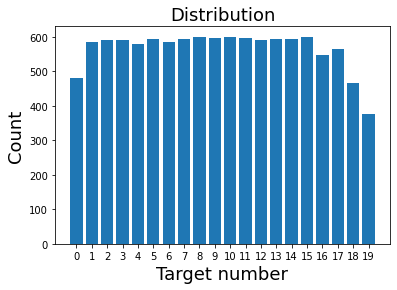

In [15]:
count = data.groupby('Target number').count().rename(columns={'Email': 'Count'})

numbers = range(0, 20)
plt.bar(numbers, count['Count'])
plt.title('Distribution', fontsize=18)
plt.xlabel('Target number', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(numbers, fontsize=10)
plt.show()

## Text classification using MLP

In [16]:
# Retrieve data
newsdata_train = fetch_20newsgroups(subset='train', shuffle=True)
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)

train_email = newsdata_train.data
train_label = newsdata_train.target

test_email = newsdata_test.data
test_label = newsdata_test.target

In [17]:
max_words = 10000
num_classes = 20

def preprocessing(train_data, test_data, mode):
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(train_data)
  x_train = tokenizer.texts_to_matrix(train_data, mode=mode)
  x_test = tokenizer.texts_to_matrix(test_data, mode=mode)
  return x_train, x_test, tokenizer.index_word

In [18]:
x_train, x_test, index_to_word = preprocessing(train_email, test_email, 'binary')
y_train = to_categorical(y=train_label, num_classes=num_classes)
y_test = to_categorical(y=test_label, num_classes=num_classes)

## Create MLP model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

In [20]:
model = Sequential(layers=[
  Input(shape=(max_words, )),
  Dense(units=256, activation='relu'),
  Dropout(rate=0.5),
  Dense(units=128, activation='relu'),
  Dropout(rate=0.5),
  Dense(units=num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)

Epoch 1/5
80/80 [==============================] - 4s 46ms/step - loss: 2.3045 - acc: 0.3250 - val_loss: 1.0115 - val_acc: 0.8180
Epoch 2/5
80/80 [==============================] - 3s 43ms/step - loss: 0.8932 - acc: 0.7500 - val_loss: 0.4816 - val_acc: 0.8772
Epoch 3/5
80/80 [==============================] - 3s 43ms/step - loss: 0.4366 - acc: 0.8814 - val_loss: 0.3498 - val_acc: 0.8984
Epoch 4/5
80/80 [==============================] - 3s 43ms/step - loss: 0.2627 - acc: 0.9344 - val_loss: 0.3258 - val_acc: 0.9028
Epoch 5/5
80/80 [==============================] - 3s 43ms/step - loss: 0.1753 - acc: 0.9557 - val_loss: 0.3170 - val_acc: 0.9072


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


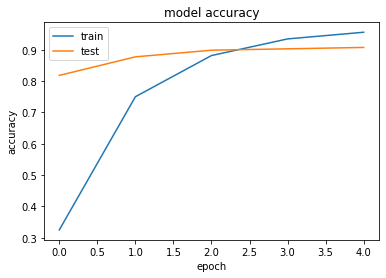

In [24]:
print(history.history.keys())
# Plot training history for model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
score = model.evaluate(x=x_test, y=y_test, batch_size=128, verbose=1)
print('Model Accuracy when using binary mode: {}'.format(score[1]))

59/59 [==============================] - 1s 18ms/step - loss: 0.6334 - acc: 0.8278
Model Accuracy when using binary mode: 0.8278014063835144


In [27]:
# Tips: you should try to use different mode other than 'binary' like 'count', 'tfidf', 'freq' for your texts_to_matrix text preprocessing.